Домашнее задание.

​
Потренируем навыки, полученные на практическом занятии.

​
Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

​
Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)

​
Переменная, которую надо предсказать - ’MEDV’.

​
Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])

​
Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

На курсе Feature Engineering на это домашнее задание были даны следующие рекомендации от Вячеслава Потапова:
    
    Сергей, добрый день.

Вы провели неплохой анализ, и для обкатки навыков задание выполненно.
Насчет качества модели: есть инженерный подход, когда мы не влоб кидаем все данные в модель и ждем результата (хотя иногда и это прокатывает), а делаем feature engineering и разбиение данных на группы.
Например в данных реально может содержаться несколько подмножеств.
Ради интереса - постройте гистограмммы переменных и увидите, что для некоторых переменных отчителиво видны две и более групп.
Первая идея - сделать разные модели для каждой группы (например по величинине налога).

пример из жизни: у вас есть москва и есть рублевка. Пытаться обучить модель предсказывать одинаково хорошо цены и там и там - не очень идея. А вот сделать две отдельные модели на каждую группу - welcome)


In [159]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [161]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [162]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- CRIM - уровень преступности на душу населения по городам
- ZN - доля жилой земли, зонированной для участков более 25 000 кв. Футов.
- INDUS - доля не-розничных бизнес-акров на город
- CHAS - фиктивная переменная CHAS Charles River (= 1, если тракт ограничивает реку; 0 в противном случае)
- NOX - концентрация оксидов азота NOX (частей на 10 миллионов)
- RM - среднее количество комнат на жилое помещение
- AGE - доля занятых собственниками единиц, построенных до 1940 года
- DIS - взвешивает расстояния до пяти бостонских центров занятости
- RAD - индекс доступности к радиальным магистралям
- TAX - ставка налога на имущество за 10 000 долларов США
- PTRATIO - Соотношение учеников и учителей PTRATIO по городам
- B - 1000 (Bk - 0,63) ^ 2, где Bk - доля чернокожих по городам.
- LSTAT - % ниже статуса населения
- MEDV - Медианная стоимость домов, занимаемых владельцами, в $ 1000

Попытаемся обучить линейную модель на основе входных переменных, ничего не меняя, с целью создания ориентира, который будем улучшать

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [164]:
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Bias: 36.459488385090005
Error: 3.270862810900314


In [165]:
reg.score(X,y)

0.7406426641094094

Проведем анализ датасета

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [167]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [168]:
# посмотрим на гистограммы переменных

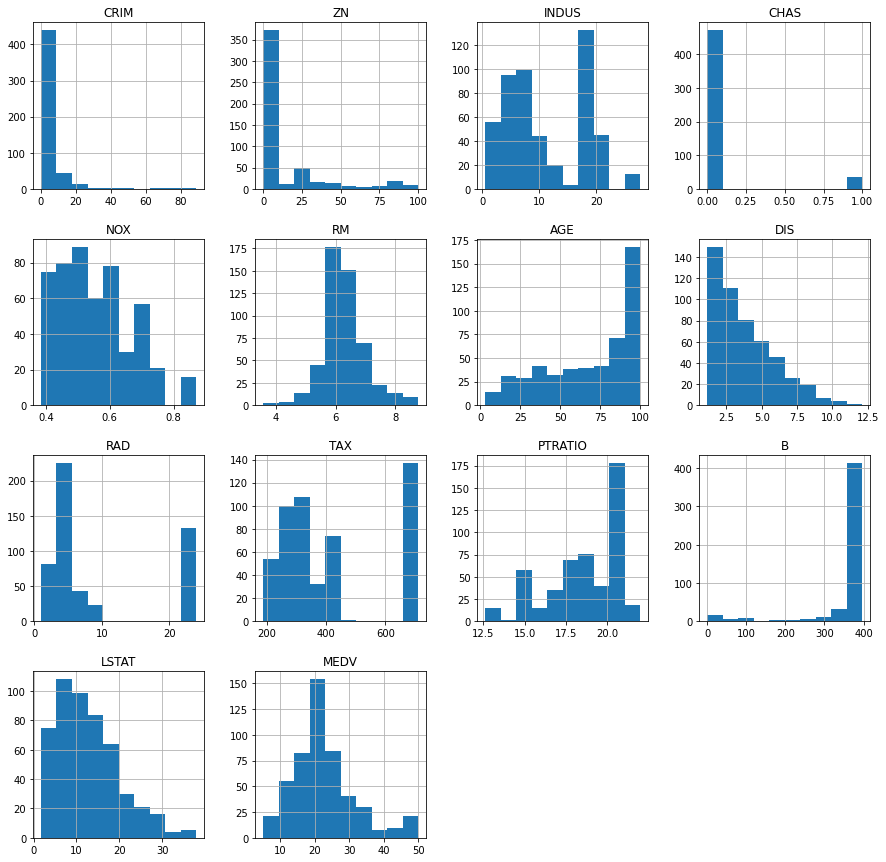

In [169]:
data.hist(figsize=(15,15))
plt.show()

In [170]:
# как и говорил Вячеслав, по переменной TAX наблюдаются 2 группы, также по переменной RAD

<AxesSubplot:>

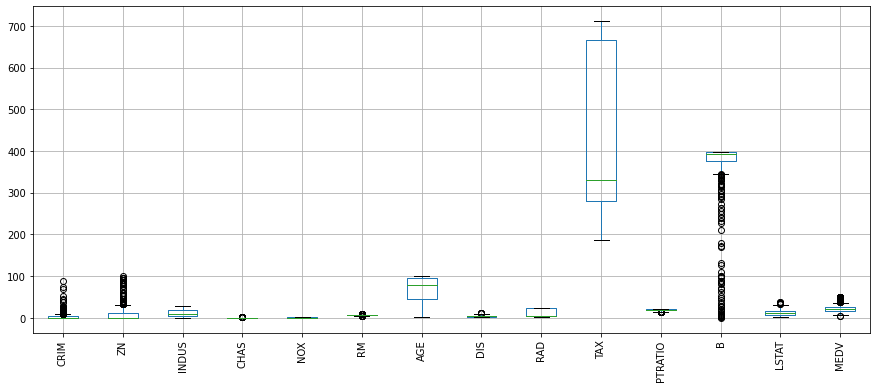

In [171]:
# построим боксплот, посмотрим, есть ли выбросы
data.boxplot(figsize=(15,6), rot=90)

In [172]:
# выбросов не наблюдается

In [173]:
data['TAX'].unique()

array([296, 242, 222, 311, 307, 279, 252, 233, 243, 469, 226, 313, 256,
       284, 216, 337, 345, 305, 398, 281, 247, 270, 276, 384, 432, 188,
       437, 403, 193, 265, 255, 329, 402, 348, 224, 277, 300, 330, 315,
       244, 264, 223, 254, 198, 285, 241, 293, 245, 289, 358, 304, 287,
       430, 422, 370, 352, 351, 280, 335, 411, 187, 334, 666, 711, 391,
       273], dtype=int64)

<AxesSubplot:>

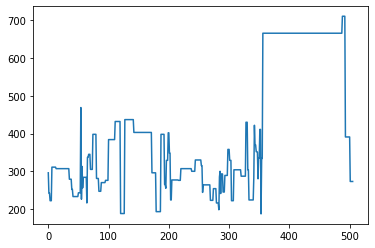

In [174]:
data['TAX'].plot()

In [175]:
# разделим датасет на 2 группы, с налогом до 500 и более

In [176]:
data1 = data[data['TAX']<500]
data1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [177]:
X1 = data1.iloc[:,:-1]
# X1

In [178]:
y1 = data1['MEDV']
# y1

In [179]:
reg = LinearRegression().fit(X1, y1)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X1)
print('Error: {}'.format(mean_absolute_error(pred_values, y1)))

Weights: [ 1.26405176  0.01811826  0.0235786   0.82434948 -8.31562304  9.16330566
 -0.05220867 -0.92292603  0.24717274 -0.01344386 -0.62282074  0.01624559
 -0.06624855]
Bias: -14.50577199744641
Error: 2.337669559365447


In [180]:
reg.score(X1,y1)

0.8653742665588336

In [181]:
# качество стало лучше

In [182]:
data2 = data[data['TAX']>500]
data2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
356,8.98296,0.0,18.10,1,0.770,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8
357,3.84970,0.0,18.10,1,0.770,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7
358,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7
359,4.26131,0.0,18.10,0,0.770,6.112,81.3,2.5091,24,666,20.2,390.74,12.67,22.6
360,4.54192,0.0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6


In [183]:
X2 = data2.iloc[:,:-1]
y2 = data2['MEDV']

In [184]:
reg = LinearRegression().fit(X2, y2)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X2)
print('Error: {}'.format(mean_absolute_error(pred_values, y2)))

Weights: [-1.46104961e-01  2.68327027e-14 -2.85252338e-02  8.86482079e+00
 -3.74982502e+01 -1.72751216e+00  2.74546965e-02 -3.43201543e+00
  5.91809830e-02 -1.33157212e-01  2.95904915e-04  3.67191352e-03
 -8.13354885e-01]
Bias: 159.80093169832907
Error: 3.4403434263521957


In [185]:
reg.score(X2,y2)

0.6861854601470506

In [186]:
# тут стало хуже, возможно мало обучающих данных, либо это недвижимость, выделяющаяся относительно 
# всего датасета, например элитная, и в датасете нет признаков, учитывающих её особенности

In [187]:
# Повторим с переменной RAD

<AxesSubplot:>

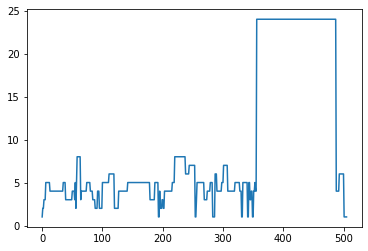

In [188]:
data['RAD'].plot()

In [189]:
# разобьем датасет по RAD=10

In [190]:
data3 = data[data['RAD']<10]
data3

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [191]:
X3 = data3.iloc[:,:-1]
y3 = data3['MEDV']

In [192]:
reg = LinearRegression().fit(X3, y3)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X3)
print('Error: {}'.format(mean_absolute_error(pred_values, y3)))

Weights: [ 1.08099794  0.01789289  0.03671007  0.84674303 -8.52725962  9.19551263
 -0.05241383 -0.92816831  0.22286033 -0.01064222 -0.62781639  0.01636042
 -0.06225475]
Bias: -15.339693492365761
Error: 2.3497044342811804


In [193]:
reg.score(X3,y3)

0.8668618250123166

In [194]:
# хороший результат

In [195]:
data4 = data[data['RAD']>10]
data4

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
356,8.98296,0.0,18.1,1,0.770,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8
357,3.84970,0.0,18.1,1,0.770,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7
358,5.20177,0.0,18.1,1,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7
359,4.26131,0.0,18.1,0,0.770,6.112,81.3,2.5091,24,666,20.2,390.74,12.67,22.6
360,4.54192,0.0,18.1,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2.81838,0.0,18.1,0,0.532,5.762,40.3,4.0983,24,666,20.2,392.92,10.42,21.8
484,2.37857,0.0,18.1,0,0.583,5.871,41.9,3.7240,24,666,20.2,370.73,13.34,20.6
485,3.67367,0.0,18.1,0,0.583,6.312,51.9,3.9917,24,666,20.2,388.62,10.58,21.2
486,5.69175,0.0,18.1,0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98,19.1


In [196]:
X4 = data4.iloc[:,:-1]
y4 = data4['MEDV']

In [197]:
reg = LinearRegression().fit(X4, y4)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X4)
print('Error: {}'.format(mean_absolute_error(pred_values, y4)))

Weights: [-1.46771540e-01 -3.94823063e-14  2.96263014e-13  8.90465494e+00
 -3.77685418e+01 -1.73356085e+00  3.07817666e-02 -3.40327418e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.64849603e-03
 -8.10801998e-01]
Bias: 71.85373798284317
Error: 3.5011073211098314


In [198]:
reg.score(X4,y4)

0.6832356524906404

In [199]:
# тут снова хуже результат, возможно мало обучающих данных, либо это недвижимость, выделяющаяся относительно 
# всего датасета, например элитная, и в датасете нет признаков, учитывающих её особенности

In [200]:
data2['RAD'].unique()

array([24,  4], dtype=int64)

In [201]:
data[data['RAD']==4]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
14,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1
17,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21.0,386.75,14.67,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6


In [202]:
# видно что по значению RAD (доступность магистралей), возможно географически в одном месте встречается обычные и элитные дома

In [203]:
data[data['RAD']==24].TAX.value_counts()

666    132
Name: TAX, dtype: int64

In [204]:
# видно что в месте с самым высоким индексом RAD только элитная недвижимость

In [205]:
# создадим в датасете дополнительный признак

In [206]:
data.loc[data['TAX']>500, 'elite'] = 1

In [207]:
data.loc[data['TAX']<500, 'elite'] = 0

In [208]:
data['elite'] = data['elite'].astype(int)

In [209]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,elite
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [210]:
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'elite']]
y = data['MEDV']

In [211]:
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1.08718764e-01  4.54147603e-02  1.54009421e-02  2.69429108e+00
 -1.74589150e+01  3.79997245e+00  8.93288188e-04 -1.46604256e+00
  2.67674932e-01 -1.33614261e-02 -9.61694500e-01  9.28839138e-03
 -5.26391088e-01  1.18613006e+00]
Bias: 37.030544410073944
Error: 3.2733352187621283


In [212]:
reg.score(X,y)

0.7408012159068601

In [213]:
# не прокатило, лучше обучать отдельно